In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
from sklearn.decomposition import NMF

NMF_TRAIN_SIZE = 1000 # approximately 100 digits for each digit

In [4]:
nmf = NMF(n_components=10, random_state=0, max_iter=200)
nmf.fit(mnist['data'][:NMF_TRAIN_SIZE])

/home/jstox/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


NMF(n_components=10, random_state=0)

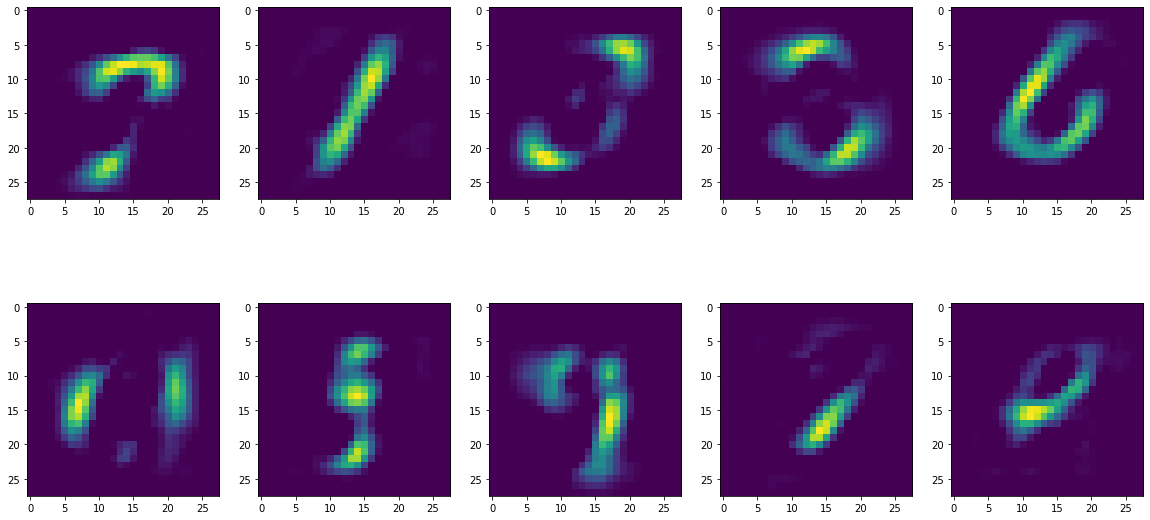

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf.components_[i].reshape((28,28)))

In [11]:
nmf_higher_iter = NMF(n_components=10, random_state=0, max_iter=500)
nmf_higher_iter.fit(mnist['data'][:NMF_TRAIN_SIZE])

NMF(max_iter=500, n_components=10, random_state=0)

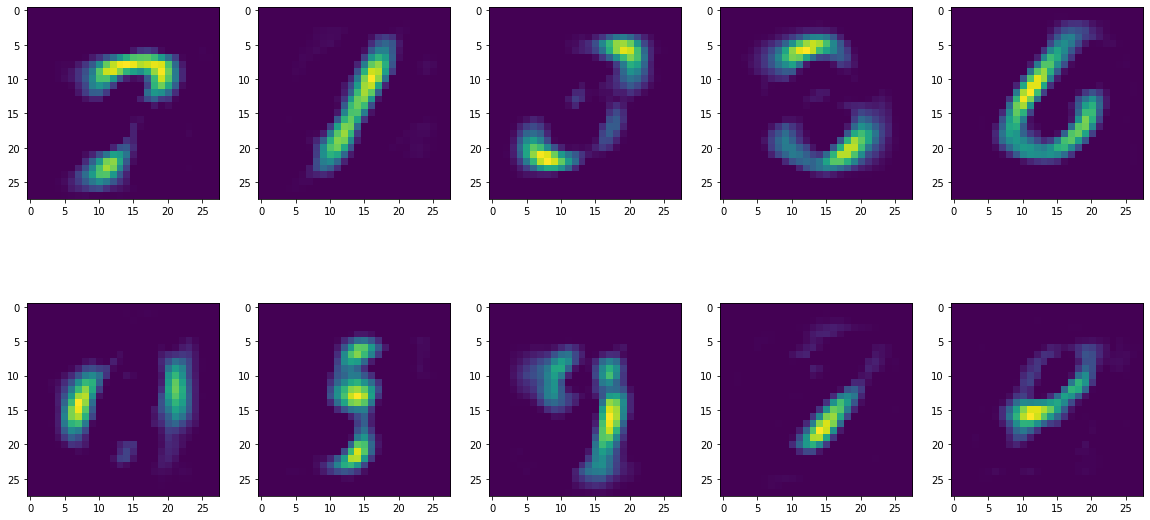

In [12]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf_higher_iter.components_[i].reshape((28,28)))

### Almost no difference seen when increasing max_iterations parameter

In [8]:
nines = mnist['data'][[i for i,v in enumerate(mnist['target']) if v == '9'], :]

In [9]:
len(nines) # wil only grab first 1000

6958

In [15]:
nmf_9 = NMF(n_components=10, random_state=0, max_iter=200)
nmf_9.fit(nines[:NMF_TRAIN_SIZE])

NMF(n_components=10, random_state=0)

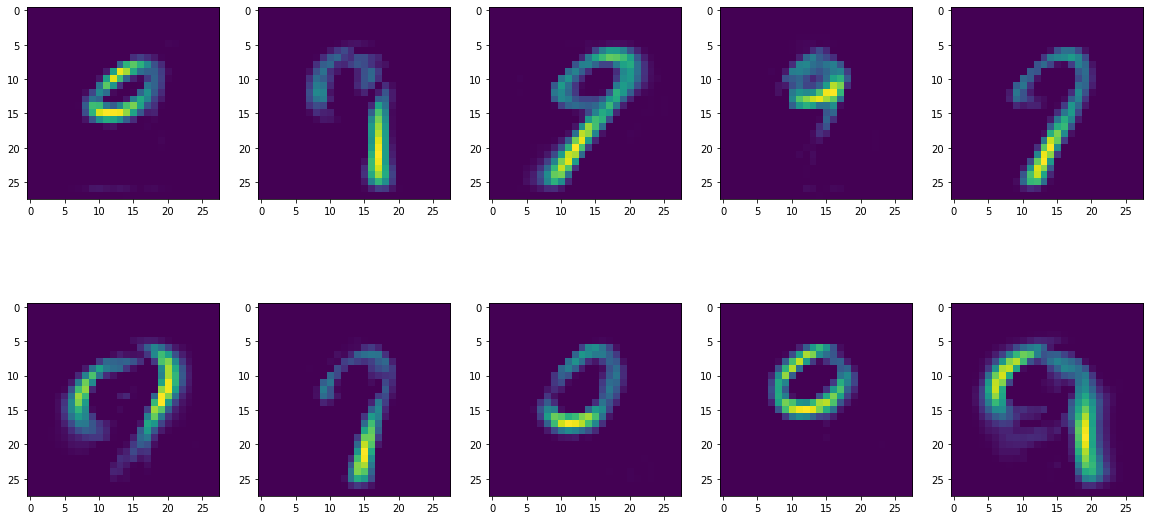

In [16]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf_9.components_[i].reshape((28,28)))

In [17]:
nmf_9 = NMF(n_components=3, random_state=0, max_iter=200)
nmf_9.fit(nines[:NMF_TRAIN_SIZE])

NMF(n_components=3, random_state=0)

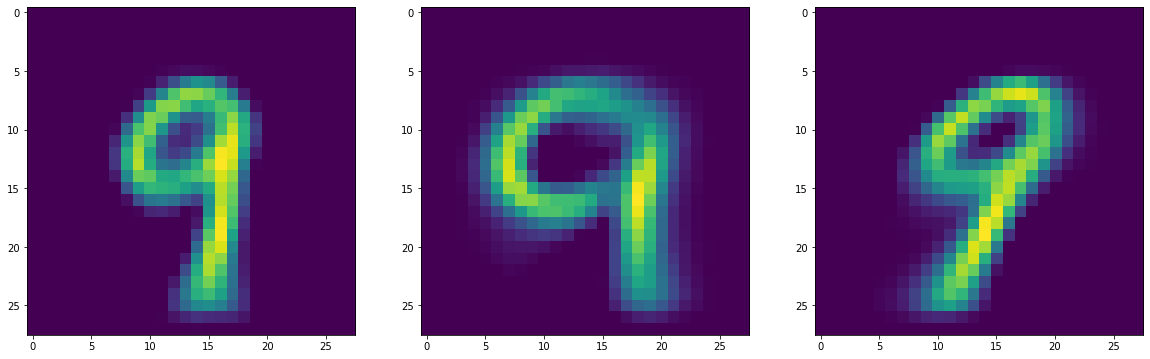

In [20]:
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(nmf_9.components_[i].reshape((28,28)))

In [21]:
NEW_NMF_TRAIN_SIZE = 10000

nmf = NMF(n_components=10, random_state=0, max_iter=200)
nmf.fit(mnist['data'][:NEW_NMF_TRAIN_SIZE])

/home/jstox/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


NMF(n_components=10, random_state=0)

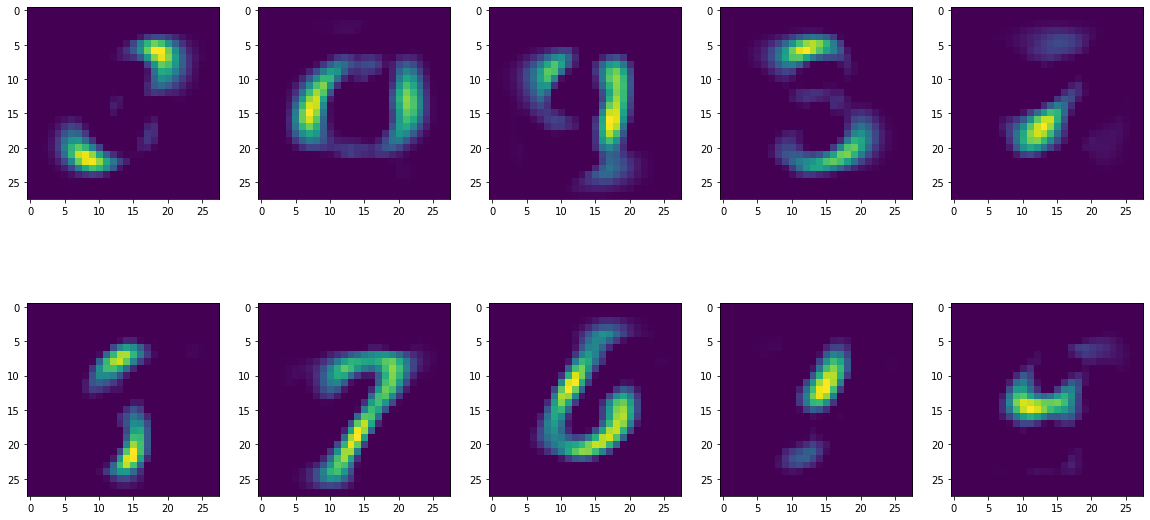

In [23]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf.components_[i].reshape((28,28)))

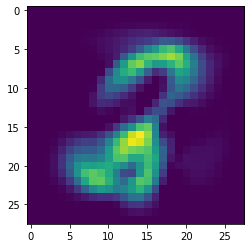

In [27]:
plt.imshow((nmf.components_[5]+ nmf.components_[4] + nmf.components_[0]).reshape((28,28)))

In [28]:
mnist_transformed = nmf.transform(mnist['data'][NMF_TRAIN_SIZE:NMF_TRAIN_SIZE + 10])
mnist_full_transform = nmf.inverse_transform(mnist_transformed)

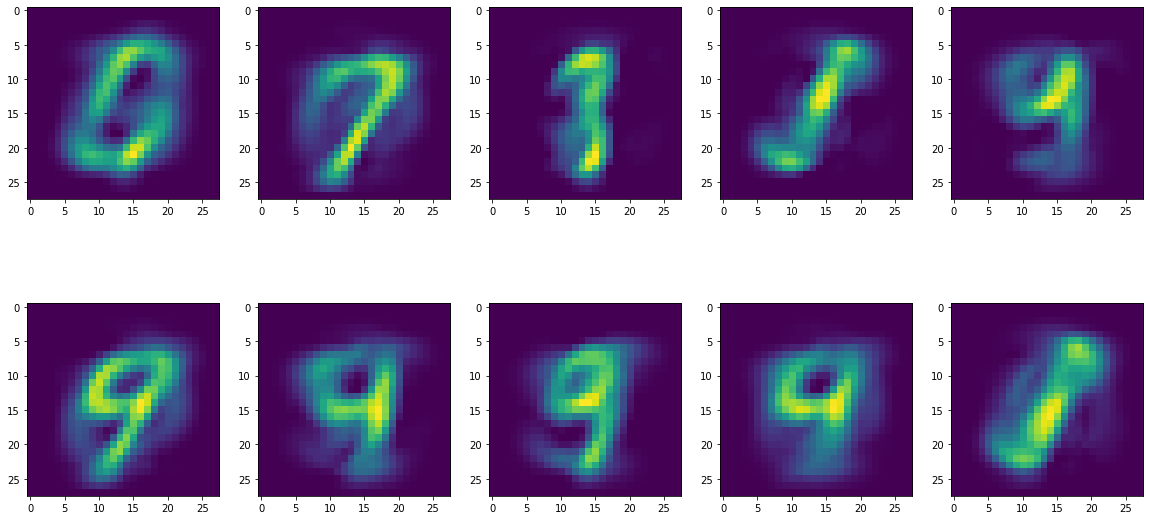

In [30]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(mnist_full_transform[i].reshape((28,28)))

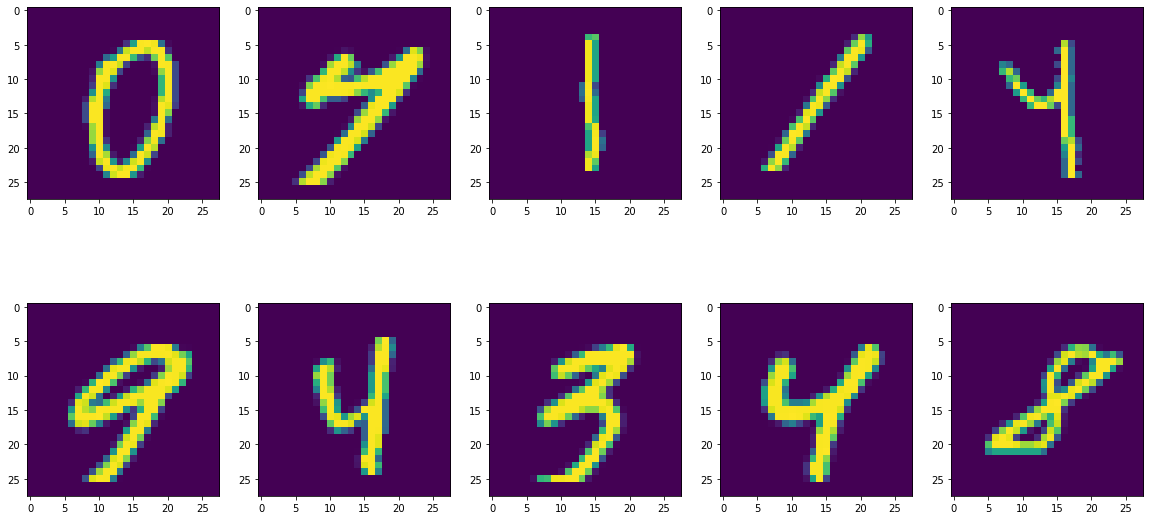

In [32]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(mnist['data'][NMF_TRAIN_SIZE:NMF_TRAIN_SIZE + 10][i].reshape((28,28)))

In [33]:
mnist['target'][NMF_TRAIN_SIZE:NMF_TRAIN_SIZE+10]

array(['0', '7', '1', '1', '4', '9', '4', '3', '4', '8'], dtype=object)

In [39]:
nmf_20_components = NMF(n_components=20, random_state=0, max_iter=200)
nmf_20_components.fit(mnist['data'][:NEW_NMF_TRAIN_SIZE])

/home/jstox/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


NMF(n_components=20, random_state=0)

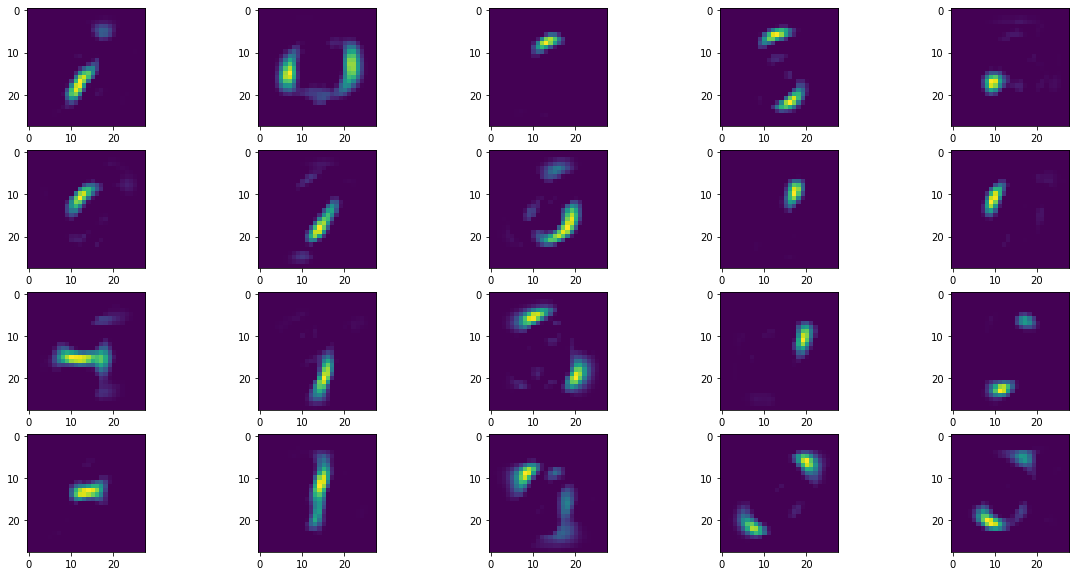

In [40]:
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(nmf_20_components.components_[i].reshape((28,28)))

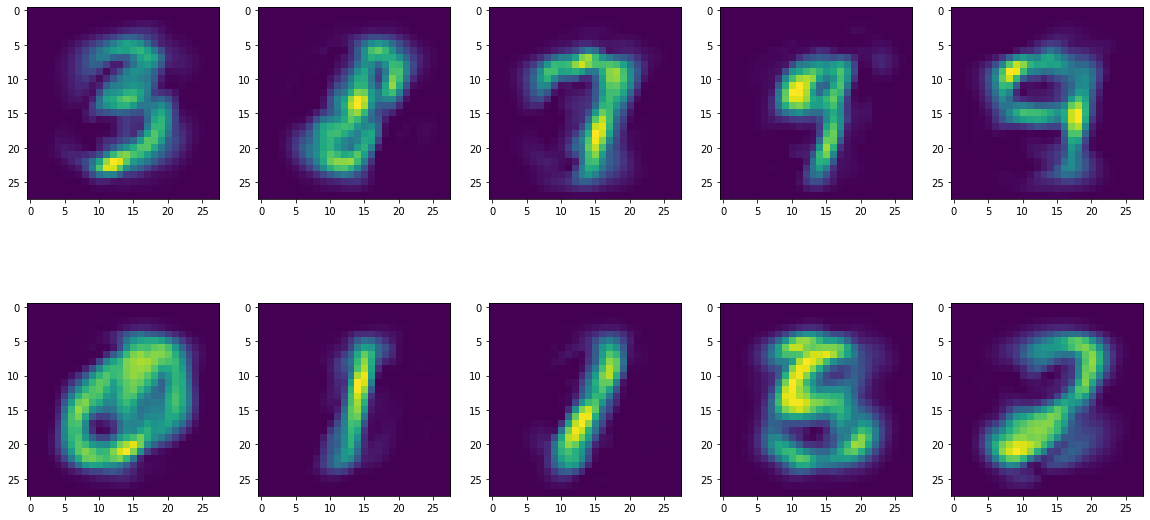

In [41]:
mnist_transformed = nmf_20_components.transform(mnist['data'][NEW_NMF_TRAIN_SIZE:NEW_NMF_TRAIN_SIZE + 10])
mnist_full_transform = nmf_20_components.inverse_transform(mnist_transformed)

plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(mnist_full_transform[i].reshape((28,28)))

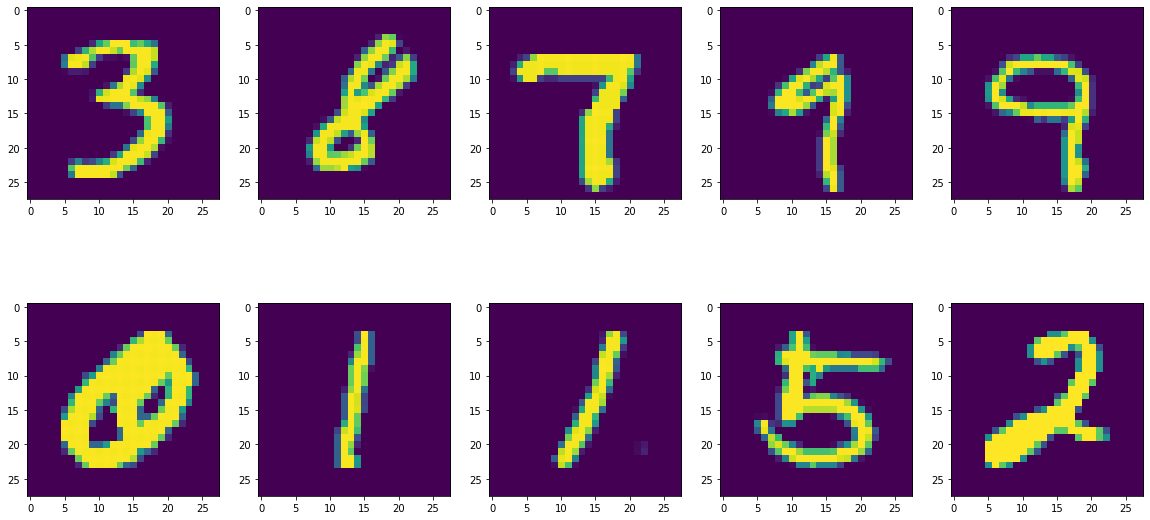

In [42]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(mnist['data'][NEW_NMF_TRAIN_SIZE:NEW_NMF_TRAIN_SIZE + 10][i].reshape((28,28)))

/home/jstox/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


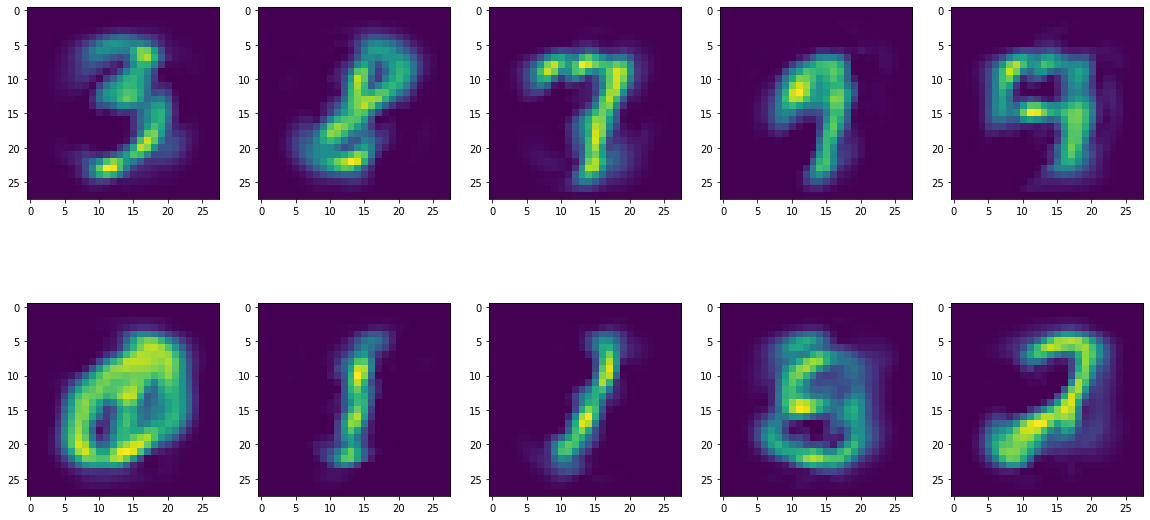

In [44]:
TRAIN_SIZE = 10000

nmf_30_components = NMF(n_components=30, random_state=0, max_iter=200)
nmf_30_components.fit(mnist['data'][:TRAIN_SIZE])

mnist_transformed = nmf_30_components.transform(mnist['data'][TRAIN_SIZE:TRAIN_SIZE + 10])
mnist_full_transform = nmf_30_components.inverse_transform(mnist_transformed)

plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(mnist_full_transform[i].reshape((28,28)))